Model Specification
-------------------------------
The following function is used to create the model.

In [404]:
def init_model(features):
    model = Sequential()
    model.add(Conv1D(256, 4, activation="relu",
                    input_shape=(features,1), padding="same", strides=1,kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv1D(128, 4, activation="relu",
                    padding="same", strides=1,kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv1D(64, 4, activation="relu",
                    padding="same", strides=1,kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu',kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu',kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu',kernel_initializer="he_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid',kernel_initializer="he_uniform"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
    return model

In [406]:
model = init_model(X_train.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_83 (Conv1D)           (None, 33, 256)           1280      
_________________________________________________________________
batch_normalization_21 (Batc (None, 33, 256)           1024      
_________________________________________________________________
dropout_260 (Dropout)        (None, 33, 256)           0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 33, 128)           131200    
_________________________________________________________________
batch_normalization_22 (Batc (None, 33, 128)           512       
_________________________________________________________________
dropout_261 (Dropout)        (None, 33, 128)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 33, 64)            32832     
__________

Train on 2200 samples, validate on 335 samples
Epoch 1/150
 - 3s - loss: 0.2219 - acc: 0.9077 - val_loss: 0.3557 - val_acc: 0.8567
Epoch 2/150
 - 3s - loss: 0.2289 - acc: 0.8950 - val_loss: 0.3276 - val_acc: 0.8716
Epoch 3/150
 - 3s - loss: 0.2248 - acc: 0.9000 - val_loss: 0.3131 - val_acc: 0.8687
Epoch 4/150
 - 3s - loss: 0.2194 - acc: 0.9041 - val_loss: 0.3189 - val_acc: 0.8657
Epoch 5/150
 - 3s - loss: 0.2298 - acc: 0.9023 - val_loss: 0.3078 - val_acc: 0.8776
Epoch 6/150
 - 3s - loss: 0.2263 - acc: 0.9027 - val_loss: 0.3358 - val_acc: 0.8657
Epoch 7/150
 - 3s - loss: 0.2201 - acc: 0.9023 - val_loss: 0.3285 - val_acc: 0.8657
Epoch 8/150
 - 3s - loss: 0.2170 - acc: 0.9077 - val_loss: 0.3713 - val_acc: 0.8687
Epoch 9/150
 - 3s - loss: 0.2247 - acc: 0.9005 - val_loss: 0.3666 - val_acc: 0.8567
Epoch 10/150
 - 3s - loss: 0.2202 - acc: 0.9045 - val_loss: 0.3414 - val_acc: 0.8597
Epoch 11/150
 - 3s - loss: 0.2238 - acc: 0.9059 - val_loss: 0.3558 - val_acc: 0.8657
Epoch 12/150
 - 3s - loss: 

Epoch 97/150
 - 3s - loss: 0.1804 - acc: 0.9214 - val_loss: 0.4210 - val_acc: 0.8269
Epoch 98/150
 - 3s - loss: 0.1888 - acc: 0.9205 - val_loss: 0.3490 - val_acc: 0.8657
Epoch 99/150
 - 3s - loss: 0.1850 - acc: 0.9227 - val_loss: 0.3572 - val_acc: 0.8537
Epoch 100/150
 - 3s - loss: 0.1837 - acc: 0.9209 - val_loss: 0.3670 - val_acc: 0.8567
Epoch 101/150
 - 3s - loss: 0.1884 - acc: 0.9223 - val_loss: 0.3186 - val_acc: 0.8657
Epoch 102/150
 - 3s - loss: 0.1893 - acc: 0.9232 - val_loss: 0.4055 - val_acc: 0.8567
Epoch 103/150
 - 3s - loss: 0.2008 - acc: 0.9141 - val_loss: 0.3602 - val_acc: 0.8597
Epoch 104/150
 - 3s - loss: 0.1730 - acc: 0.9327 - val_loss: 0.3637 - val_acc: 0.8567
Epoch 105/150
 - 3s - loss: 0.1762 - acc: 0.9250 - val_loss: 0.3675 - val_acc: 0.8537
Epoch 106/150
 - 3s - loss: 0.1771 - acc: 0.9250 - val_loss: 0.3755 - val_acc: 0.8537
Epoch 107/150
 - 3s - loss: 0.1791 - acc: 0.9277 - val_loss: 0.3568 - val_acc: 0.8567
Epoch 108/150
 - 3s - loss: 0.1879 - acc: 0.9209 - val_lo

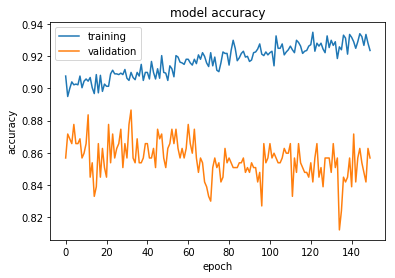

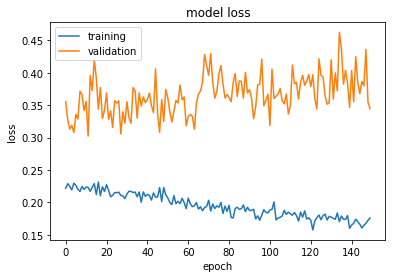

In [409]:
history = LossHistory()
hiss = model.fit(X_train, y_train, epochs=150, batch_size=64,
                callbacks=[history],
                validation_data=(X_test,y_test), verbose=2)
score = model.evaluate(X_test, y_test, batch_size=64)
# print(score)
# plot_losses(history.losses)

print(score)
plt.plot(hiss.history['acc'])
plt.plot(hiss.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.plot(hiss.history['loss'])
plt.plot(hiss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)

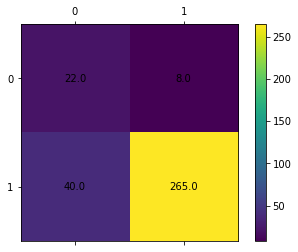

In [410]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# plt.matshow(cm)
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
im = ax.matshow(cm)
fig.colorbar(im)

for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()